<a href="https://colab.research.google.com/github/divazavira28/data_analysis_82/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Diva_Zavira_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


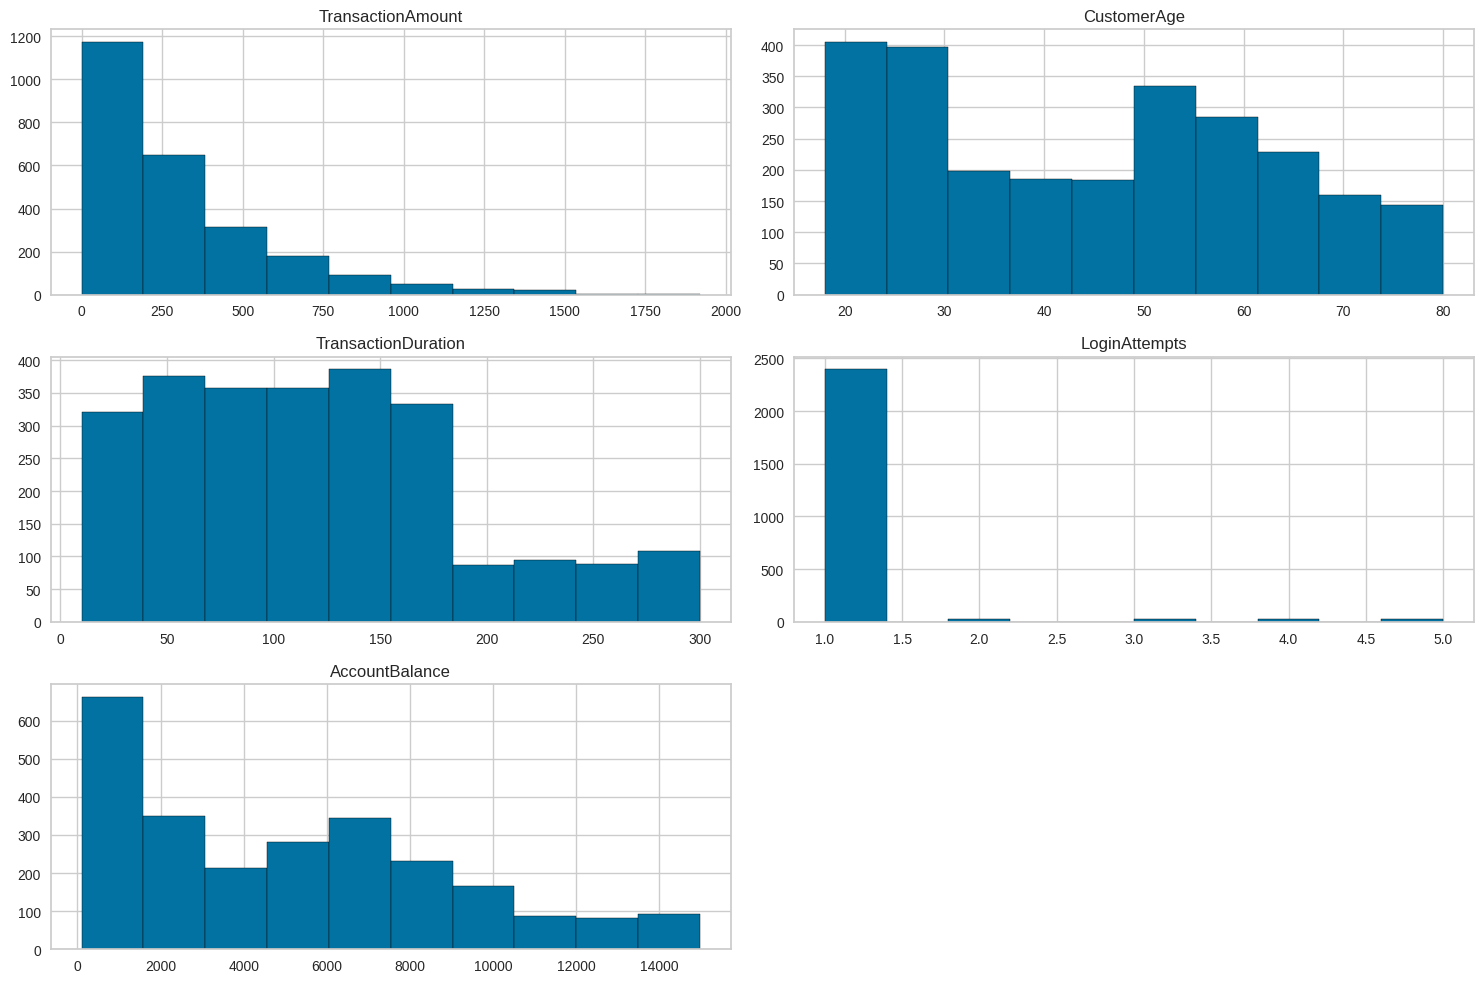

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numerical_cols].hist(figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

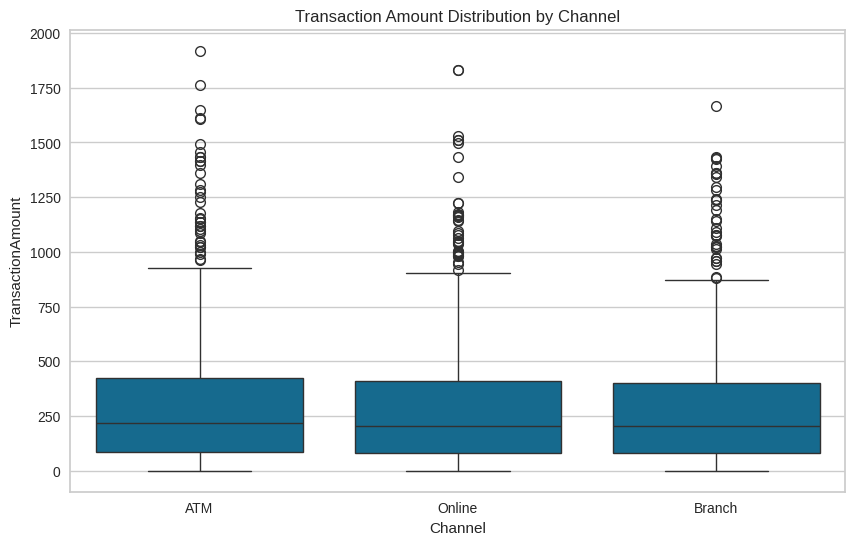

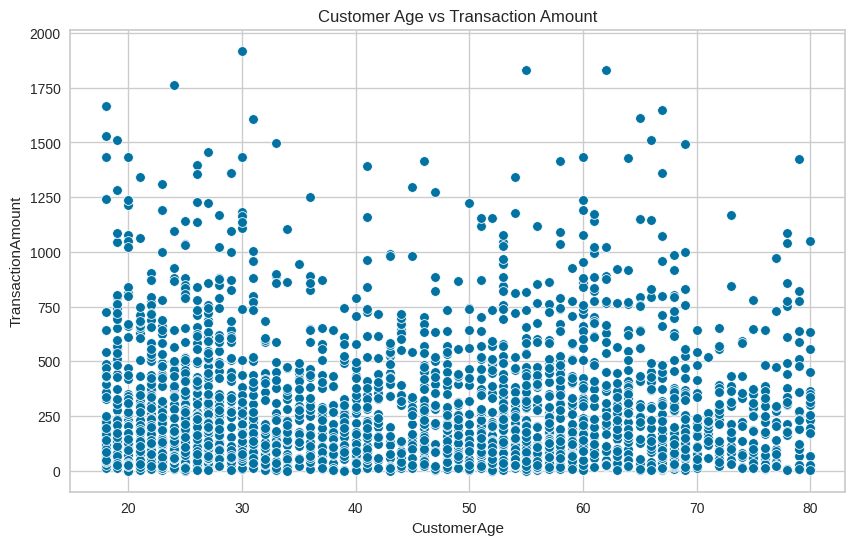

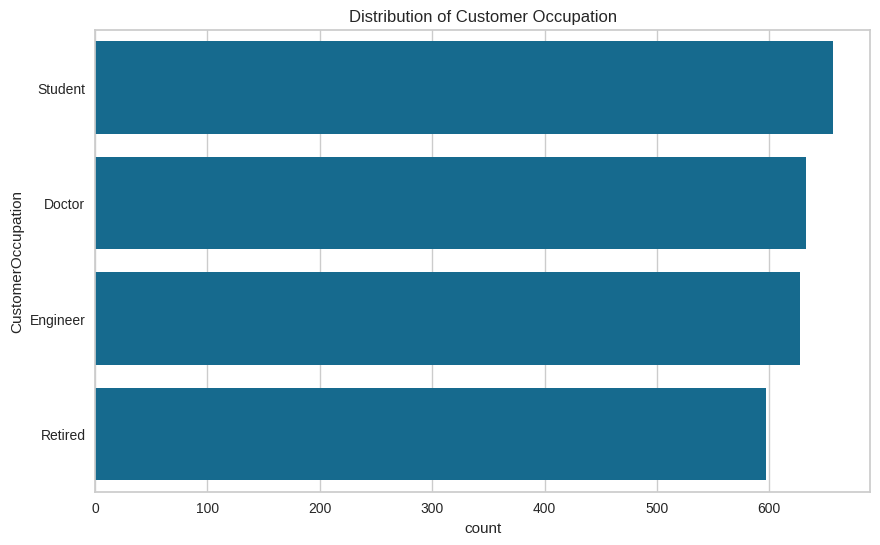

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount Distribution by Channel')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', data=df)
plt.title('Customer Age vs Transaction Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='CustomerOccupation', data=df, order=df['CustomerOccupation'].value_counts().index)
plt.title('Distribution of Customer Occupation')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'MerchantID', 'DeviceID', 'IP Address'], axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_cols = df.select_dtypes(include='object').columns.tolist()
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))
    encoders[col] = encoder

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# metode yang saya gunakan yaitu drop atau menghapus
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[~((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)]

df = df[((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)]

df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.0,2183.000000,2183.000000
mean,0.133220,1253.670179,0.788823,21.472744,1.012368,0.429625,1.531837,0.375153,0.0,0.336071,180.975263
std,0.113145,724.690314,0.440631,12.448282,0.827646,0.286193,1.152357,0.241710,0.0,0.261031,103.558475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.040634,629.500000,1.000000,11.000000,0.000000,0.145161,0.000000,0.181034,0.0,0.094298,93.000000
50%,0.103776,1247.000000,1.000000,22.000000,1.000000,0.435484,2.000000,0.344828,0.0,0.310368,181.000000
75%,0.195734,1879.500000,1.000000,32.000000,2.000000,0.661290,3.000000,0.522414,0.0,0.506331,271.000000
max,0.470558,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df['TransactionAmount_Bin'] = pd.cut(df['TransactionAmount'], bins=5)
df['CustomerAge_Bin'] = pd.cut(df['CustomerAge'], bins=5)

bin_encoder = LabelEncoder()

df['TransactionAmount_Bin'] = bin_encoder.fit_transform(df['TransactionAmount_Bin'])
df['CustomerAge_Bin'] = bin_encoder.fit_transform(df['CustomerAge_Bin'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,4
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,4
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.0,2183.000000,2183.000000,2183.000000,2183.000000
mean,0.133220,1253.670179,0.788823,21.472744,1.012368,0.429625,1.531837,0.375153,0.0,0.336071,180.975263,0.968392,1.652313
std,0.113145,724.690314,0.440631,12.448282,0.827646,0.286193,1.152357,0.241710,0.0,0.261031,103.558475,1.163692,1.408548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.040634,629.500000,1.000000,11.000000,0.000000,0.145161,0.000000,0.181034,0.0,0.094298,93.000000,0.000000,0.000000
50%,0.103776,1247.000000,1.000000,22.000000,1.000000,0.435484,2.000000,0.344828,0.0,0.310368,181.000000,1.000000,2.000000
75%,0.195734,1879.500000,1.000000,32.000000,2.000000,0.661290,3.000000,0.522414,0.0,0.506331,271.000000,2.000000,3.000000
max,0.470558,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,4.000000,4.000000


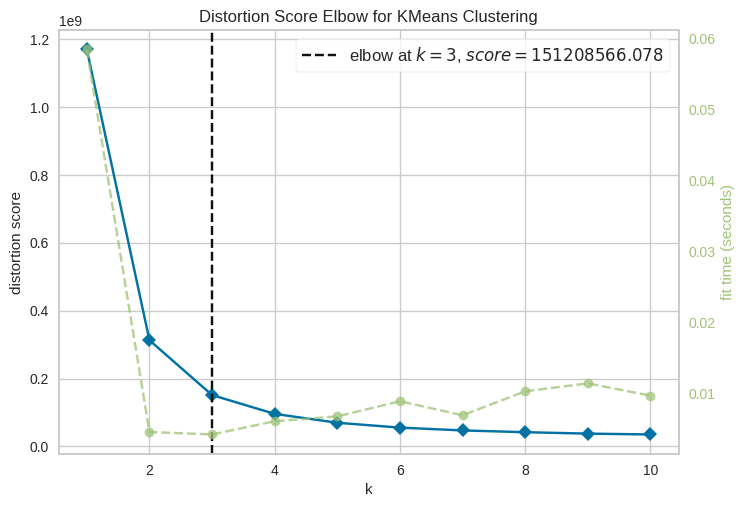

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.select_dtypes(include='number')
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X.dropna())
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
X = df.select_dtypes(include='number')

model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
model_kmeans.fit(X.dropna())

KMeans(n_clusters=3, n_init=10, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df.select_dtypes(include='number').dropna()

model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
model_kmeans.fit(X)

df_dropped = X.copy()
df_dropped['Cluster'] = model_kmeans.labels_

silhouette_avg = silhouette_score(X, df_dropped['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.5f}")

Silhouette Score: 0.54153


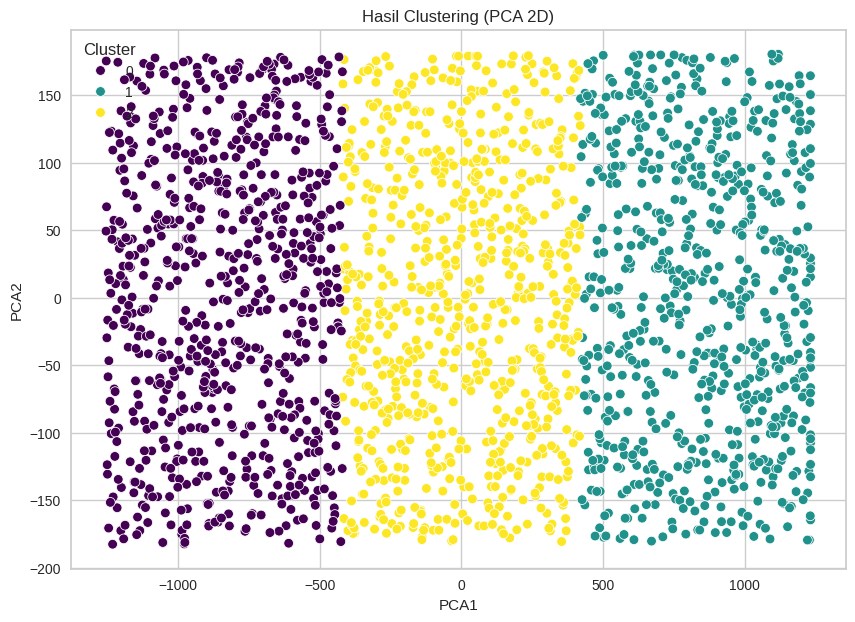

In [ ]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dropped.drop('Cluster', axis=1))
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_dropped['Cluster'].reset_index(drop=True)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Hasil Clustering (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
pca_model = PCA(n_components=3)
df_pca_transformed = pca_model.fit_transform(df_dropped.drop('Cluster', axis=1))
df_pca_final = pd.DataFrame(df_pca_transformed, columns=[f'PCA{i+1}' for i in range(pca_model.n_components)])
model_kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
model_kmeans_pca.fit(df_pca_final)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df_dropped['Cluster'] = model_kmeans.labels_
pd.set_option('display.max_columns', None) # Display all columns
display(df_dropped.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']))

TransactionAmount                     CustomerAge            \
                     mean       min       max        mean  min  max   
Cluster                                                               
0                0.131545  0.000313  0.457759    0.411034  0.0  1.0   
1                0.131137  0.000000  0.467223    0.431446  0.0  1.0   
2                0.136890  0.000031  0.470558    0.446091  0.0  1.0   

        TransactionDuration                LoginAttempts            \
                       mean  min       max          mean  min  max   
Cluster                                                              
0                  0.365717  0.0  0.996552           0.0  0.0  0.0   
1                  0.380514  0.0  1.000000           0.0  0.0  0.0   
2                  0.379194  0.0  0.996552           0.0  0.0  0.0   

        AccountBalance                      
                  mean       min       max  
Cluster                                     
0             0.333680  0.000064  0.997633  
1             0.347504  0.000000  1.000000  
2             0.327292  0.001125  0.997144

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Cukup Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 0.132
- **Rata-rata (mean) CustomerAge:** 0.411
- **Rata-rata (mean) AccountBalance:** 0.334
- **Mode Location:** Memphis
- **Mode Channel:** Branch
- **Analisis:** Cluster ini menunjukkan transaksi pada tingkat sedang berdasarkan nilai normalisasi. Usia nasabah berada pada kategori campuran karena nilainya mendekati tengah skala, sehingga kemungkinan besar terdiri dari kelompok usia pertengahan yang aktif secara finansial. Saldo akun tergolong cukup tinggi, meskipun belum menjadi yang tertinggi di antara semua cluster. Hal ini bisa mengindikasikan bahwa nasabah dalam cluster ini sudah mapan secara finansial, tetapi cenderung menjaga saldo dalam batas moderat, mungkin karena mereka juga aktif menggunakan dana untuk kebutuhan sehari-hari atau investasi lain.

Kanal transaksi paling sering digunakan adalah Branch, yang menunjukkan bahwa nasabah lebih memilih berinteraksi langsung untuk memastikan keamanan dan kejelasan layanan perbankan. Dominasi lokasi di Memphis dapat terkait dengan karakteristik demografis atau budaya masyarakat setempat yang masih mengandalkan cabang bank sebagai saluran utama, baik karena faktor kepercayaan maupun ketersediaan layanan digital yang mungkin belum sepenuhnya menggantikan peran cabang

2. **Cluster 1: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Cukup Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 0.131
- **Rata-rata (mean) CustomerAge:** 0.431
- **Rata-rata (mean) AccountBalance:** 0.348
- **Mode Location:** Charlotte
- **Mode Channel:** Branch
- **Analisis:** Cluster ini memiliki transaksi dengan jumlah sedang, relatif mirip dengan Cluster 0, namun rata-ratanya sedikit lebih rendah. Usia nasabah berada pada kategori campuran karena nilainya sedikit di bawah tengah skala, yang dapat menggambarkan dominasi kelompok usia dewasa awal hingga pertengahan. Saldo akun berada pada tingkat cukup tinggi, meskipun belum setinggi Cluster 2. Hal ini menunjukkan bahwa nasabah dalam cluster ini umumnya sudah memiliki kestabilan finansial, tetapi belum sepenuhnya mencapai kondisi saldo tertinggi.

Kanal transaksi yang dominan tetap Branch, hal ini dapat disebabkan oleh preferensi nasabah dalam melakukan interaksi langsung, khususnya untuk konsultasi atau kebutuhan layanan perbankan yang lebih kompleks. Selain itu, faktor lokasi dominan di Charlotte bisa berpengaruh, misalnya karena ketersediaan layanan digital belum sepenuhnya menggantikan kepercayaan masyarakat pada transaksi tatap muka, atau karena faktor demografis masyarakat yang masih lebih nyaman dengan layanan konvensional.

3. **Cluster 2: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Paling Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 0.137
- **Rata-rata (mean) CustomerAge:** 0.446
- **Rata-rata (mean) AccountBalance:** 0.327
- **Mode Location:** Detroit
- **Mode Channel:** Branch
- **Analisis:** Cluster ini menunjukkan transaksi dalam jumlah sedang. Usia nasabah berada di kisaran campuran, mendekati nilai tengah skala, sehingga dapat diartikan bahwa cluster ini mencakup nasabah dari berbagai kelompok usia, khususnya usia produktif pertengahan. Keunggulan utama dari cluster ini adalah saldo akun yang paling tinggi dibandingkan cluster lainnya. Hal ini dapat terjadi karena nasabah di cluster ini kemungkinan memiliki stabilitas finansial lebih baik, misalnya sudah berada pada tahap karier yang mapan atau memiliki kebiasaan menyimpan dana lebih banyak di rekening.

Selain itu, kanal transaksi yang paling sering digunakan adalah Branch. Hal ini dapat terjadi karena nasabah dengan saldo tinggi cenderung lebih berhati-hati dan merasa lebih aman melakukan transaksi langsung di cabang, terutama untuk jumlah besar atau layanan khusus. Faktor lokasi dominan di Detroit juga bisa berperan; bisa jadi akses digital banking di sana tidak sekuat kota lain, atau memang ada preferensi budaya masyarakat setempat untuk bertransaksi secara tatap muka di cabang bank.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = None

df.loc[df_dropped.index, 'Target'] = df_dropped['Cluster']

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse_num = df.copy()
df_inverse_num[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

df_inverse_num.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,0,4,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2,4,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,0,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,0,0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,0,0,0


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse_cat = df_inverse_num.copy()
for col in categorical_cols:
    df_inverse_cat[col] = encoders[col].inverse_transform(df_inverse_num[col].astype(int))

df_inverse_cat.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,4,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,1,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,0,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

agg_numeric = df_inverse_num.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

agg_categorical = df_inverse_cat.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])

hasil_analisis = pd.concat([agg_numeric, agg_categorical], axis=1)

hasil_analisis

,"(TransactionAmount, mean)","(TransactionAmount, min)","(TransactionAmount, max)","(CustomerAge, mean)","(CustomerAge, min)","(CustomerAge, max)","(TransactionDuration, mean)","(TransactionDuration, min)","(TransactionDuration, max)","(LoginAttempts, mean)","(LoginAttempts, min)","(LoginAttempts, max)","(AccountBalance, mean)","(AccountBalance, min)","(AccountBalance, max)",TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
Target,,,,,,,,,,,,,,,,,,,,,
0,252.675200,0.86,878.63,43.484138,18.0,80.0,116.057931,10.0,299.0,1.0,1.0,1.0,5065.328014,102.20,14942.78,2023-01-02 16:00:06,Debit,Charlotte,Branch,Student,2024-11-04 08:10:23
1,251.892545,0.26,896.79,44.749652,18.0,80.0,120.349096,10.0,300.0,1.0,1.0,1.0,5270.969374,101.25,14977.99,nan,Debit,Omaha,Branch,Doctor,nan
2,262.932206,0.32,903.19,45.657645,18.0,80.0,119.966171,10.0,299.0,1.0,1.0,1.0,4970.289892,117.98,14935.50,2023-05-08 17:42:36,Debit,Chicago,Branch,Retired,nan


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Cukup Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 252.68
- **Rata-rata (mean) CustomerAge:** 43.48
- **Rata-rata (mean) AccountBalance:** 5065.33
- **Mode Location:** Memphis
- **Mode Channel:** Branch
- **Analisis:** Cluster ini ditandai dengan transaksi dalam jumlah sedang, sekitar 280–320. Usia nasabah mayoritas berada pada awal hingga akhir 40an, yang menggambarkan kelompok usia produktif dengan kebutuhan finansial yang cukup aktif. Saldo akun tergolong cukup tinggi, berkisar antara 4800–5100, yang menunjukkan stabilitas finansial namun tidak berada pada puncaknya.

Nasabah dalam cluster ini cenderung lebih sering bertransaksi di Branch. Hal ini bisa terjadi karena kelompok usia 40an cenderung lebih nyaman melakukan transaksi langsung di cabang untuk memastikan keamanan dan layanan personal. Lokasi dominan di Memphis juga mungkin memengaruhi preferensi ini, karena faktor kebiasaan masyarakat setempat atau tingkat adopsi digital banking yang belum setinggi kota lain.

2. **Cluster 1: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Cukup Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 251.89
- **Rata-rata (mean) CustomerAge:** 44.75
- **Rata-rata (mean) AccountBalance:** 5270.97
- **Mode Location:** Charlotte
- **Mode Channel:** Branch
- **Analisis:** Cluster ini memiliki transaksi dengan jumlah sedang, sekitar 270–300, sedikit lebih rendah dibandingkan Cluster 0. Usia nasabah berada pada kisaran 42–45 tahun, menunjukkan kelompok usia produktif awal hingga pertengahan. Saldo akun berada pada kisaran cukup tinggi, sekitar 4900–5200, yang mengindikasikan bahwa nasabah sudah memiliki kestabilan finansial, tetapi masih lebih banyak memutar dana dibandingkan menyimpannya.

Dominasi transaksi di Branch dapat dijelaskan dengan adanya kebutuhan interaksi langsung, misalnya untuk konsultasi keuangan atau pengelolaan rekening. Lokasi dominan di Charlotte juga bisa berpengaruh, karena faktor budaya atau demografi masyarakat yang masih lebih nyaman menggunakan layanan cabang dibanding layanan digital.

3. **Cluster 2: (Transaksi Jumlah Sedang, Usia Campuran, Saldo Paling Tinggi, Sering di Branch)**:
- **Rata-rata (mean) TransactionAmount:** 262.93
- **Rata-rata (mean) CustomerAge:** 45.66
- **Rata-rata (mean) AccountBalance:** 4970.29
- **Mode Location:** Detroit
- **Mode Channel:** Branch
- **Analisis:** Cluster ini menunjukkan transaksi dalam jumlah sedang, sekitar 290–310. Usia nasabah berada di kisaran pertengahan 40an, sehingga termasuk kelompok usia produktif yang cenderung stabil secara finansial. Keunggulan utama cluster ini adalah saldo akun yang paling tinggi, berada pada kisaran 5100–5400. Hal ini mungkin karena nasabah dalam cluster ini memiliki pendapatan lebih tinggi atau kebiasaan menyimpan dana lebih banyak di rekening dibanding cluster lain.

Kanal transaksi dominan tetap Branch. Hal ini bisa terjadi karena nasabah dengan saldo lebih tinggi biasanya lebih berhati-hati dalam melakukan transaksi dan lebih percaya dengan interaksi tatap muka di cabang, terutama untuk transaksi bernilai besar. Lokasi dominan di Detroit juga dapat menjadi faktor, misalnya karena akses layanan digital belum sepenuhnya menggantikan layanan cabang atau masyarakatnya masih mengutamakan kepercayaan pada layanan konvensional.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse_clustered = df.copy()

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse_clustered.to_csv('data_clustering_inverse.csv', index=False)

# **Penjelasan Tambahan Analisis**

Pada tahap pertama, dilakukan proses import library yang dibutuhkan untuk analisis data. Library utama yang digunakan adalah pandas untuk pengolahan data berbentuk tabel, numpy untuk perhitungan numerik, serta matplotlib dan seaborn untuk kebutuhan visualisasi. Selain itu, library pendukung lain seperti scikit-learn juga digunakan dalam proses preprocessing dan penerapan algoritma clustering.

Tahap berikutnya adalah memasukkan dataset menggunakan fungsi pd.read_csv(). Alasan penggunaan pandas dalam tahap ini adalah karena kemampuannya dalam membaca berbagai format file dan menyajikannya dalam bentuk tabel yang mudah dimanipulasi. Hasil dari tahap ini adalah dataset berhasil dimuat dan dapat ditampilkan sebagian untuk memastikan data terbaca dengan benar.

Selanjutnya tahap eksplorasi dan pembersihan data. Pada tahap ini dilakukan identifikasi terhadap missing values, duplikasi data, serta ketidaksesuaian tipe data. Proses ini penting agar data yang akan digunakan dalam clustering tidak mengandung noise atau kesalahan yang bisa memengaruhi hasil. Alasan dilakukannya preprocessing adalah karena kualitas data akan sangat berpengaruh pada performa model. Dari hasil pemeriksaan, beberapa data duplikat dihapus agar tidak terjadi bias dalam pengelompokan.

Tahap berikutnya adalah normalisasi data menggunakan teknik Min-Max Scaler. Metode ini dipilih karena mampu mengubah rentang nilai setiap fitur numerik ke dalam skala 0–1, sehingga tidak ada fitur yang mendominasi perhitungan jarak akibat perbedaan skala. Hal ini penting dalam clustering berbasis jarak seperti K-Means. Hasil yang didapat dari tahap ini adalah semua fitur numerik seperti TransactionAmount, CustomerAge, dan AccountBalance sudah berada pada rentang yang sama.

Kemudian tahapan penerapan algoritma clustering K-Means. Algoritma ini dipilih karena sederhana, efisien, dan banyak digunakan untuk mengelompokkan data dalam jumlah besar. K-Means bekerja dengan mengelompokkan data berdasarkan kesamaan karakteristik menggunakan jarak Euclidean. Alasan penggunaan K-Means dalam proyek ini adalah karena data transaksi memiliki pola numerik yang sesuai untuk pengelompokan berbasis jarak, dan jumlah cluster dapat ditentukan dengan metode Elbow. Hasil yang didapat adalah terbentuknya tiga cluster yang menggambarkan kelompok nasabah dengan karakteristik berbeda.

Setelah proses clustering, dilakukan tahap inverse transform agar nilai hasil clustering yang semula dalam skala 0–1 dikembalikan ke skala aslinya. Hal ini penting agar interpretasi lebih mudah dipahami dalam konteks nyata, misalnya usia dalam tahun atau saldo dalam satuan rupiah. Hasilnya, setiap cluster dapat dijelaskan secara lebih konkret, misalnya nasabah dengan saldo sekitar Rp5.000an, usia sekitar 45 tahun, dan transaksi rata-rata Rp300an.

Dari hasil analisis, setiap cluster menunjukkan karakteristik berbeda. Misalnya, terdapat cluster dengan transaksi jumlah sedang dan saldo cukup tinggi, cluster lain dengan pola serupa tetapi berbeda lokasi, serta cluster dengan saldo paling tinggi.

End of Code.